In [3]:
# from roc import ROC
import pandas as pd

import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import os


def ROC(Y_test, Y_scores, method, clf, seed):
    file_path = 'figs/roc/'
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    plt.figure(figsize=(6, 4))

    for i, preds in enumerate(Y_scores):
      fpr, tpr, _= roc_curve(Y_test, preds)
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f'{method[i]} (AUC = {roc_auc:.3f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if clf == "LR":
        plt.title('ROC - Logistic Regression')
    elif clf == "RF":
        plt.title('ROC - Random Forest')

    plt.legend(loc="lower right")
    print(f'Seed: {seed}')
    plt.savefig(f'{file_path}{clf}_{seed}.png') 
    plt.show()

Seed: 0


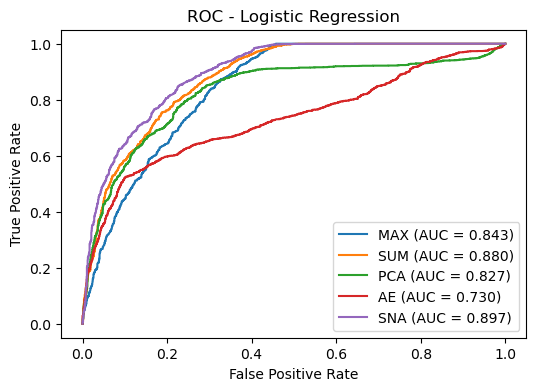

Seed: 0


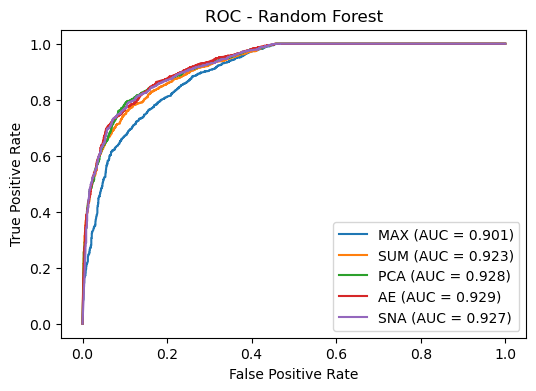

In [4]:
for clf in ["LR", "RF"]:
    for seed in range(1):
        Y_scores = pd.read_csv(f'data/{clf}_scores_{seed}.csv')
        Y_true = pd.read_csv(f'data/{clf}_true_{seed}.csv')
        Y_scores = Y_scores.values.tolist()
        Y_true = Y_true.values.tolist()
        method = ["MAX","SUM","PCA","AE","SNA"]
        ROC(Y_true, Y_scores, method, clf, seed)